<a id='step6'></a>
# <center>Train a Smartcab to Drive:</center>
 <center>(Reinforcement Learning)</center>


![smartcab](Description-Images/smartcab.jpg)

#### [**0. Introduction**](#step0) 
#### [**I. Understanding the World**](#step1)
#### [**II. Understanding the Code**](#step2) 
#### [**III. Implementing a Basic Driving Agent**](#step3)
#### [**IV. Informing the Driving Agent**](#step4) 
#### [**V. Implement a Q-Learning Driving Agent**](#step5) 

<a id='step0'></a>

----------
# <font color='brown'>0. Introduction:</font>
In this project, we will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

In [1]:
# Importing Necessary Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ast
# Pretty display for notebooks
%matplotlib inline

<a id='step1'></a>

--------------------------------------------------------------
# <font color='brown'>I. Understanding the World:</font> 
Before starting to work on implementing the driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. 

* We will set the variable ```action``` from ```class LearingAgent.choose_action(self,state )``` located in:  ' ```smartcab/agent.py``` ' to **None**. 
* And Verify if the visual simulation is enabled by setting the parameter ``` 'display' ``` of the method ``` 'Simulator' ``` assigned to the variable ```'sim'``` located in the file above to ```True```. 

We will run the '`agent.py`' agent code.

By Letting the resulting simulation run for some time we will see the various working components. we will observe that: The smart cab does not move at all. 

** Note: the *white vehicle* is the  *Smartcab* **

Since the cab doesn’t move at all there is three kinds of rewards:

- **When the light is green:** the agent may have two kinds of rewards: 
    - **If there is no oncoming traffic:** the agent receives Red scores (negative scores) because the light is green and no one has the priority to cross the intersection but him.
    - **If there is an oncoming traffic:** the agent receives Green scores (positive scores) because the cabin didn't move even if the light is green because there is some oncoming traffic who has the priority to cross the intersection first.


- **When the light is red:** the agent receives Green scores (positive scores) because the cabin doesn't move at all so it didn't cross that red light.

<a id='step2'></a>

-----------------------------

# <font color='brown'>II. Understanding the Code:</font>
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. By Openning the `/smartcab/` folder and exploring each Python file included we could say that:


### Agent.py:

In **Agent.py**: The class **LearningAgent** contains a method called run (). This function allows the user to set the final values of some attributes(Flags). These final values are going to be used to build the next simulation.

#### **Attributes related to the environment object itself:**

- **num_dummies:** positive integer can be used to set  the number of cars or agents we want to have in the environment during the simulation.(the default value of num_dummies is 100)
- **grid_size: ** tuple of positive integers can be used to set the size of the grid (the number of vertical roads, the number of Horizontal roads) we want to have in the environment during the simulation. (the default value of grid size is (8,6)).

#### **Learning Agent  attributes:** 

- **learning: ** Boolean 
    - If it is set to **False** During the training trials the primary agent is forced to not use Q-learning algorithm. And we will see later that when the agent is not learning it is going to be forced to choose a random action from the valid actions list allowed by the environment.

    - But when **learning** is set to **True**, the primary agent will have the ability to choose in each state two types of decisons. The first one with a probablity of *1-epsilon* it will use the Q-learning algorithm based on the **Utility Table** to choose the action with the maximum rewards in that state the second decision with a probability pf epsilon it will choose a random action from valid actions list allowed by the environment.


- **The learning rate Alpha**: Continuous value between 0 and 1 in our case. 
    - When learning is set to True during the training trials the learning rate Alpha is used to modify the utility table rewards of a fixed state and a fixed action. When the agent receives a reward for (state i, action j) the utility table cell (state i, action j) will be updated. And here alpha represent the percentage of considering the difference between the old reward and the new one of that cell (state i, action j). When alpha is set to 0 the new reward will have no effect on the cell value, so the cell value will be constant. When alpha is set to 1 the old value of the cell will be completely erased and will be replaced by the new reward.


- **The Exploration Factor Epsilon**: Continuous value between 0 and 1. 
    - **When learning is set to True** During the training trials the primary agent is considered to be in a state before taking the next action: Epsilon is the probability that the agent will choose a random action. And 1-epsilon is the probability that the agent will choose one of the previous actions related to that state having the maximum of rewards. When epsilon is set to 0 this means that the agent will choose by 100% the optimal action in the utility table of that state. If epsilon is set to 1 this means that the agent will choose by 100% a random action for that state(learning is disabled). 

#### **env.set_primary_agent intialization:**
- ** enforce_deadline:** Boolean:
    - When ** enforce_deadline** is set **True** it activates the dead line metric in simulator.py and environment.py. 
    - At the beginning of each trial the agent has an initial remaining time equal to 100%, the percentage of remaining time decreases at each step taken by the primary agent until the destination is reached or the remaining time reaches 0% at that time the trial will be interrupted . 
    - If the source of the interruption cames from the destination(Destination was reached) in this case  we can say that the agent has succeeded to reach the destination in time. So, the agent will rewarded positively based on the penalty metric allowed by the environment. If the source of interruption cames from the remaining time (the remaining time is equal to 0%) without reaching the destination and in that case the agent will be rewarded negatively also based on the same penalty metric allowed by the environment.
    - When ** enforce_deadline** is set to false the deadline metric won’t be activated and the trial will be interrupted  using the hard_time_limit.

#### **simulation object instantiation:**
- **update_delay: ** continuous, it represents the duration in seconds between the beginning of each step and the beginning of the next step. It represents also the minimum duration between two **successor** updates in the environment during the simulation.
- **display: ** Boolean if True the visual simulation using GUI and PyGame will be enabled. if False the visual simulation will be disabled.
- **log_metrics:** Boolean if True the results appearing in cmd window during the simulation will be saved and stored into a csv file  And/or a text file in some cases in this path: "smartcab/smartcab/logs/".If False these results won't be saved.
- **optimized: ** Boolean. When log_metrics is set to True:
    - When optimized it is set to True the results appearing in the cmd Window will be stored in two files a csv file and a txt file these files will be named as sim_improved_learning.
    - When optimized is set to false the simulation results appearing in the cmd window will stored in some other files. If learning is enabled the results will be stored in a csv and a txt files named by sim_default_learning. If learning is disabled the results will be stored only in a csv file named as: sim_no_learning.

#### **simulator.run parameters initialization:** 
- **Tolerance: ** continuous between 0 and 1. If the number of minimum training trials is reached and epsilon is inferior or equal to the tolerance value the testing phase will begin. 
- **n_test:** integer: it determines the number of test trials during the testing phase.

### Environment.py:

* In the environment.py ,when an agent performs an action  the function called is: **act(self, agent, action)** from the class  **Environment**.It takes the decided action into consideration and performs it if it was a valid action.

### Simulator.py

* The difference between render_text() and render().
    -  The render_text () function it displays the simulation results that appears in the in the cmd window or the results stored in the csv file or the txt one. These results are related to the non-GUI simulation.
    - The render () function it works only when the visual simulation is activated(display=True). It draws the full environment (roads, different agents ...). It prints Also the dynamic info in the pygame window.
 
### Planner.py:

* The function next way-point will consider East-West direction before the North-South.

<a id='step3'></a>

----
# <font color='brown'>III. Implementing a Basic Driving Agent</font>

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For the first implementation, we will navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions.We will run the agent file and simulation briefly to confirm that the driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, we will adjust following flags:
- `'learning'` - Set this to `False` to disable learning.
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

 We can disable the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`.

To assist evaluating these important metrics, we will need some visualization code.

In [2]:
def calculate_safety(data):
    """ Calculates the safety rating of the smartcab during testing. """

    good_ratio = data['good_actions'].sum() * 1.0 / \
    (data['initial_deadline'] - data['final_deadline']).sum()

    if good_ratio == 1: # Perfect driving
        return ("A+", "green")
    else: # Imperfect driving
        if data['actions'].apply(lambda x: ast.literal_eval(x)[4]).sum() > 0: # Major accident
            return ("F", "red")
        elif data['actions'].apply(lambda x: ast.literal_eval(x)[3]).sum() > 0: # Minor accident
            return ("D", "#EEC700")
        elif data['actions'].apply(lambda x: ast.literal_eval(x)[2]).sum() > 0: # Major violation
            return ("C", "#EEC700")
        else: # Minor violation
            minor = data['actions'].apply(lambda x: ast.literal_eval(x)[1]).sum()
            if minor >= len(data)/2: # Minor violation in at least half of the trials
                return ("B", "green")
            else:
                return ("A", "green")


In [3]:
def calculate_reliability(data):
    """ Calculates the reliability rating of the smartcab during testing. """

    success_ratio = data['success'].sum() * 1.0 / len(data)

    if success_ratio == 1: # Always meets deadline
        return ("A+", "green")
    else:
        if success_ratio >= 0.90:
            return ("A", "green")
        elif success_ratio >= 0.80:
            return ("B", "green")
        elif success_ratio >= 0.70:
            return ("C", "#EEC700")
        elif success_ratio >= 0.60:
            return ("D", "#EEC700")
        else:
            return ("F", "red")

In [4]:
def plot_trials(csv):
    """ Plots the data from logged metrics during a simulation."""

    data = pd.read_csv(os.path.join("logs", csv))

    if len(data) < 10:
        print "Not enough data collected to create a visualization."
        print "At least 20 trials are required."
        return

    # Create additional features
    data['average_reward'] = (data['net_reward'] / (data['initial_deadline'] - data['final_deadline'])).rolling(window=10, center=False).mean()
    data['reliability_rate'] = (data['success']*100).rolling(window=10, center=False).mean()  # compute avg. net reward with window=10
    data['good_actions'] = data['actions'].apply(lambda x: ast.literal_eval(x)[0])
    data['good'] = (data['good_actions'] * 1.0 / \
        (data['initial_deadline'] - data['final_deadline'])).rolling(window=10, center=False).mean()
    data['minor'] = (data['actions'].apply(lambda x: ast.literal_eval(x)[1]) * 1.0 / \
        (data['initial_deadline'] - data['final_deadline'])).rolling(window=10, center=False).mean()
    data['major'] = (data['actions'].apply(lambda x: ast.literal_eval(x)[2]) * 1.0 / \
        (data['initial_deadline'] - data['final_deadline'])).rolling(window=10, center=False).mean()
    data['minor_acc'] = (data['actions'].apply(lambda x: ast.literal_eval(x)[3]) * 1.0 / \
        (data['initial_deadline'] - data['final_deadline'])).rolling(window=10, center=False).mean()
    data['major_acc'] = (data['actions'].apply(lambda x: ast.literal_eval(x)[4]) * 1.0 / \
        (data['initial_deadline'] - data['final_deadline'])).rolling(window=10, center=False).mean()
    data['epsilon'] = data['parameters'].apply(lambda x: ast.literal_eval(x)['e']) 
    data['alpha'] = data['parameters'].apply(lambda x: ast.literal_eval(x)['a']) 


    # Create training and testing subsets
    training_data = data[data['testing'] == False]
    testing_data = data[data['testing'] == True]

    plt.figure(figsize=(12,8))


    ###############
    ### Average step reward plot
    ###############

    ax = plt.subplot2grid((6,6), (0,3), colspan=3, rowspan=2)
    ax.set_title("10-Trial Rolling Average Reward per Action")
    ax.set_ylabel("Reward per Action")
    ax.set_xlabel("Trial Number")
    ax.set_xlim((10, len(training_data)))

    # Create plot-specific data
    step = training_data[['trial','average_reward']].dropna()

    ax.axhline(xmin = 0, xmax = 1, y = 0, color = 'black', linestyle = 'dashed')
    ax.plot(step['trial'], step['average_reward'])


    ###############
    ### Parameters Plot
    ###############

    ax = plt.subplot2grid((6,6), (2,3), colspan=3, rowspan=2)

    # Check whether the agent was expected to learn
    if csv != 'sim_no-learning.csv':
        ax.set_ylabel("Parameter Value")
        ax.set_xlabel("Trial Number")
        ax.set_xlim((1, len(training_data)))
        ax.set_ylim((0, 1.05))

        ax.plot(training_data['trial'], training_data['epsilon'], color='blue', label='Exploration factor')
        ax.plot(training_data['trial'], training_data['alpha'], color='green', label='Learning factor')

        ax.legend(bbox_to_anchor=(0.5,1.19), fancybox=True, ncol=2, loc='upper center', fontsize=10)

    else:
        ax.axis('off')
        ax.text(0.52, 0.30, "Simulation completed\nwith learning disabled.", fontsize=24, ha='center', style='italic')	


    ###############
    ### Bad Actions Plot
    ###############

    actions = training_data[['trial','good', 'minor','major','minor_acc','major_acc']].dropna()
    maximum = (1 - actions['good']).values.max()

    ax = plt.subplot2grid((6,6), (0,0), colspan=3, rowspan=4)
    ax.set_title("10-Trial Rolling Relative Frequency of Bad Actions")
    ax.set_ylabel("Relative Frequency")
    ax.set_xlabel("Trial Number")

    ax.set_ylim((0, maximum + 0.01))
    ax.set_xlim((10, len(training_data)))

    ax.set_yticks(np.linspace(0, maximum+0.01, 10))

    ax.plot(actions['trial'], (1 - actions['good']), color='black', label='Total Bad Actions', linestyle='dotted', linewidth=3)
    ax.plot(actions['trial'], actions['minor'], color='orange', label='Minor Violation', linestyle='dashed')
    ax.plot(actions['trial'], actions['major'], color='orange', label='Major Violation', linewidth=2)
    ax.plot(actions['trial'], actions['minor_acc'], color='red', label='Minor Accident', linestyle='dashed')
    ax.plot(actions['trial'], actions['major_acc'], color='red', label='Major Accident', linewidth=2)

    ax.legend(loc='upper right', fancybox=True, fontsize=10)


    ###############
    ### Rolling Success-Rate plot
    ###############

    ax = plt.subplot2grid((6,6), (4,0), colspan=4, rowspan=2)
    ax.set_title("10-Trial Rolling Rate of Reliability")
    ax.set_ylabel("Rate of Reliability")
    ax.set_xlabel("Trial Number")
    ax.set_xlim((10, len(training_data)))
    ax.set_ylim((-5, 105))
    ax.set_yticks(np.arange(0, 101, 20))
    ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

    # Create plot-specific data
    trial = training_data.dropna()['trial']
    rate = training_data.dropna()['reliability_rate']

    # Rolling success rate
    ax.plot(trial, rate, label="Reliability Rate", color='blue')


    ###############
    ### Test results
    ###############

    ax = plt.subplot2grid((6,6), (4,4), colspan=2, rowspan=2)
    ax.axis('off')

    if len(testing_data) > 0:
        safety_rating, safety_color = calculate_safety(testing_data)
        reliability_rating, reliability_color = calculate_reliability(testing_data)

        # Write success rate
        ax.text(0.40, .9, "{} testing trials simulated.".format(len(testing_data)), fontsize=14, ha='center')
        ax.text(0.40, 0.7, "Safety Rating:", fontsize=16, ha='center')
        ax.text(0.40, 0.42, "{}".format(safety_rating), fontsize=40, ha='center', color=safety_color)
        ax.text(0.40, 0.27, "Reliability Rating:", fontsize=16, ha='center')
        ax.text(0.40, 0, "{}".format(reliability_rating), fontsize=40, ha='center', color=reliability_color)

    else:
        ax.text(0.36, 0.30, "Simulation completed\nwith testing disabled.", fontsize=20, ha='center', style='italic')	

    plt.tight_layout()
    plt.show()

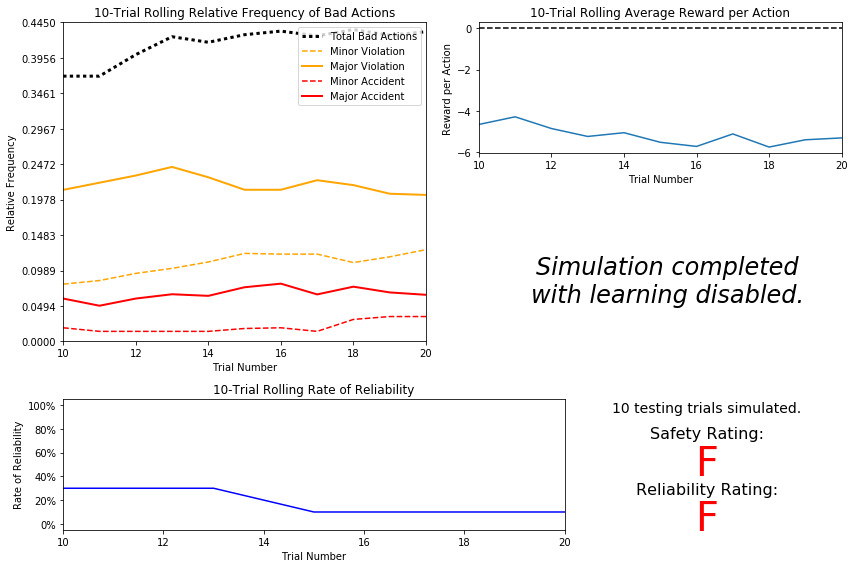

In [5]:
# Load the 'sim_no-learning' log file from the initial simulation results
plot_trials('sim_no-learning.csv')

### Observation  of the  Basic Driving Agent:

Using the visualization above that was produced from the initial simulation, we will provide an analysis and make several observations about the driving agent:

* Bad decisions frequency:
    - At the training trial number 11 the primary agent was making bad decisions almost 36% of the time but at the end of the training phase this percentage increases to 43%.


* Bad decisions causing accidents:
    - At the beginning of the training the sum of the relative frequency of minor and major accident was around 0.065 as a result the percentage of those bad actions that cause accidents is around 18%. (18% of the bad decisions cause accidents). By the end of the training phase that relative frequency increses to 0.08 which means that 18.60% of the bad decisions cause accidents.


* Rate of reliability signification:
    - Since the agent drives randomly and has limited number of steps a rate of reliability of **F Level** was expected. From the rolling rate of reliability: it appears that At the 11th trial the agent has 30% in reliability rate and by the 16th trial this rate has decreases to almost 15%.


* kind of rewards is the agent is receiving:
    - From the rolling average of reward, it appears that the average reward per action is between [-6, -4]. Since the percentage of good actions was around 55%. This negative average can be justified by the percentage of actions that causes major accident (6%) this type of actions is penalized heavily.



* Results changes as the number of trials increases:
    - The rolling rate of reliability has been changed significantly from 30% at the beginning to 15% at the end. 
    - The rolling average reward per action didn’t change significantly between [-6, -4]
    - The total bad actions increases significantly from 36% to 43%. 
    - The relative frequency of major violations has been changed significantly from 0.2 at 11th trial to 0.24 at to 12th trial and it has decreased to 0.2 again at 20th trial.
    - The relative frequency of minor violation has been increased significantly from 0.075 at the 11th trial to 0.12 at the 20th trial
    - The relative frequency of major accident has been changed significantly its always around 0.05.
    - The relative frequency of minor accident has not been changed significantly its always around 0.015.


* The Smartcab safety: 
    - The smart cab cannot be considered safe or reliable for its passengers since at each step the agent chooses a random action statisticaly speaking: the percentage of bad actions is high enough to consider the smartcab unsafe and the rate of reliability doesn’t exceed 30% so the smart cab is not reliable.So ratings of **F**,**F levels** were expected.

<a id='step4'></a>

-----
# <font color='brown'>IV. Informing the Driving Agent: </font>

The second step is to create an optimized Q-learning driving agent which defines a set of states the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. 

### Identify States
By inspecting the `'build_state()'` agent function it shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### <center>Driving law when no U-turns allowed:</center>
* When Light is 'red' the agent must idle 
* Unless: 
    - if the agent want to go right 
    - And
    - the traffic coming from Left won't go 'forward’: Left_value ! =  ‘forward’
    - In this case the agent can go right
* When Light is 'green' the agent should not idle
* Unless:
    - if agent want to go 'left' 
    - And 
    - The Oncoming traffic has direction equal to: 'forward' or 'right'
    - In this case the agent must stop.

* **Reliability learning: Waypoint** is the only relevant feature since this feature is the outcome of calculating the Manhattan distance between the actual position and the final destination and the different directions must be chosen so that the agent arrives to the destination as fast as possible. Choosing always the correct waypoint will lead the agent to the destination in a less time steps. (Light, Left, Right, Oncoming and deadline are not relevant for reliability since these features don’t bring any information about the shortest path in the grid.)



* ** Safety learning: From the Driving law above it appears that: Light, Left and Oncoming** are relevant since they bring necessary information about the dummies agents in the intersection also Light brings indirectly some information about the agents having the priority in the intersection. Waypoint and Deadline are not relevant for safety since they don’t bring any info about actions of the dummies agent or the state of the intersection. The input Right brings some information about traffic coming from the right direction but this info is not necessary since the agent doesn't care about the traffic coming from the right direction.

##### The relevant features are: 

$Inputs['light']$

$Inputs['left']$

$Inputs['oncoming']$

$Waypoint$

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, we would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. 

#### Sate space size:
**$$State= (inputs['light'], waypoint, inputs['oncoming'], inputs['left'])$$**
* **The size of the state space :** *

- $Light=[green,red]$ , $size =2$


- $Waypoint=[None,left,right,forward]$,$ size=4$


- $Left=[left,right,forward, None]$, $size=4$


- $Oncoming=[left, right, forward, None]$, $size=4$
 

$Space size=$ 2 x 4 x 4 x 4 $= 128$

### Update the Driving Agent State
For the second implementation, we will navigate to the `'build_state()'` agent function and set the `'state'` variable to a tuple of all the features necessary for Q-Learning. we should verify that the driving agent is updating its state by running the agent file and simulation.

<a id='step5'></a>

-----
# <font color='brown'>V. Implement a Q-Learning Driving Agent:</font>

The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, we will create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, it will update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. 

For this project, we will implement a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor.

The agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, we are expecting to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, we will implement a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, we will adjust the following flags and setup:
- `'enforce_deadline'` - We will set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - We will set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - We will set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - We will set this to `'10'` to perform 10 testing trials.
- `'learning'` - We will set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, we will use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

By setting the `'verbose'` flag to `True` it will help in debugging. Flags that have been set here should be returned to their default setting when debugging. Flags default parameters are located in `'/smartcab/agent.py'`. 

Once we have successfully completed the initial Q-Learning simulation, By running the code cell below we will visualize the results. log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

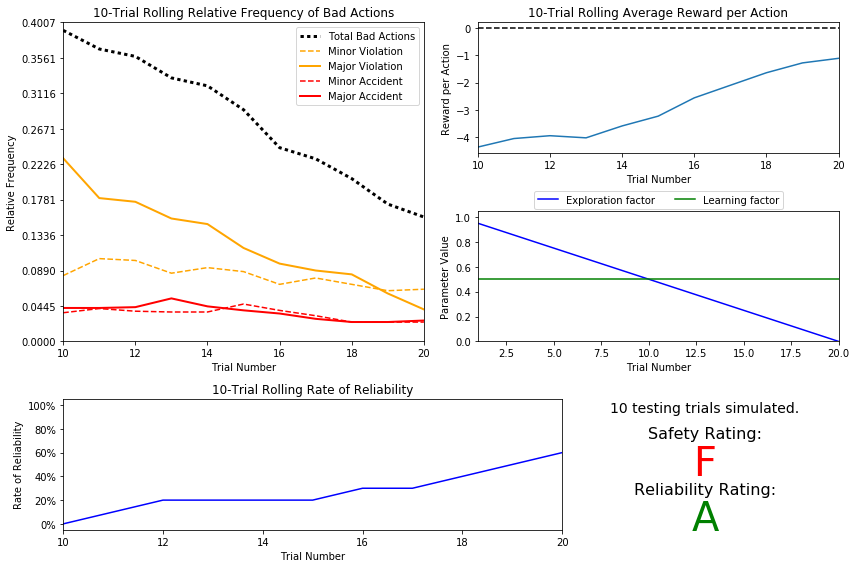

In [6]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
plot_trials('sim_default-learning.csv')

Using the visualization above that was produced from the default Q-Learning simulation, we will provide an analysis and make observations about the driving agent. 

#### Observations after implementing Q-Learning:

* Bad decisions Frequency:
    - At the beginning of the training the primary agent was making bad decisions almost 39% of the time but at the end of the training phase this percentage decreased significantly to 15%.


*  Bad decisions causing accidents:
    - At the beginning of the training the sum of the relative frequency of minor and major accidents was around 0.079 as a result the percentage of those bad actions were causing accidents is around 20%. At the end of the training phase the relative frequency of minor and major accidents was around 0.06 which means that 40% of the bad decisions were causing accidents.


*  Rate of reliability Significance:
- Since Q-learning is activated reliability level was expected to increase. At the end of the 20th trial this rating was around 60% so the expected rating in reliability during the testing phase should have a **D level** as rating grade. But by chance this grade was **A** since the number of testing trials was very small.


* Kind of rewards:
    - Since the percentage of valid actions increases from 60% to 83% it appears that the average reward per action increases from -4.5 at the beginning of the training phase to -1 at the end. This small negative average can be justified by the sum of relative frequencies violations and accidents at the end of training phase (0.22) which means that around 22% of total actions were penalized heavily.


* Results variations:
    
    - The rolling rate of reliability increses from 5% to 60%. 
    - The rolling average reward per action increases from -4.5 at the beginning to -1.
    - The total bad actions percentage decreases from 39% to 17%. 
    - The relative frequency of major violations decreases from 0.23 at 11th trial to 0.05 at 20th trial.
    - The relative frequency of minor violation had ups and downs but in average it decreases from 0.09 at the 11th trial to 0.07 at the 20th trial but this decrease is not significant. 
    - The relative frequency of major accident didn’t change significantly it’s always around 0.04.
    - The relative frequency of minor accident didn’t change significantly it’s always around 0.04


* Smartcab safety and reliability:
    - The percentage of bad actions is not small enough to consider The smart cab as safe for its passengers. 
    - Even if the reliability grade was **A**, the reliability rating doesn’t exceed 60%(grade: D). This grade will decrease if the total number of testing trial increases. So, in general this cabin cannot be considered as reliable. 



- It appears that the default Q-Learning doesn't have a significant influence on major accidents frequency when learning was disabled.



- The driving agent required exactly 20 training trials. When the agent tries the 21th trial ;21 is superior than 20 which is the minimum number of trials allowed by the simulator file; it finds that epsilon =0 which is inferior than the tolerance value (0.05).

- The decaying function is represented accurately from 0.95 to 0 with a slope of -0.05.


- ** Safety and Reliability ratings comparison:** 
    - Safety ratings obtained from the previous simulations are similar. Since the default Q-Learning doesn't have a significant influence on the major accidents frequency obtained from the first simulation when learning was disabled. But actually, the learning has its effect since the number of bad actions at the end of 20th trial is significantly inferior than number of bad actions obtained earlier.
    - Reliability ratings are not similar for the 10 tests trials. When Learning is enabled the reliability rating is higher compared to ‘sim no learning’ reliability rating.



## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on the Q-Learning implementation, we shoud consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation,  we will adjust the following flags and setup:
- `'enforce_deadline'` - We will set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - We will set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - We will set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - We will set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - We will set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - We will set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - We will set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - We will set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - We will set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, we could use a decaying function  for $\epsilon$ (the exploration factor). Note that whichever function we use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$

We may also use a decaying function for $\alpha$ (the learning rate) if we so choose, however this is typically less common. If we do that, we should be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

Once we have successfully completed the improved Q-Learning simulation, by running the code cell below we will visualize the results. log files are overwritten when identical simulations are run, so we should be careful with what log file is being loaded!

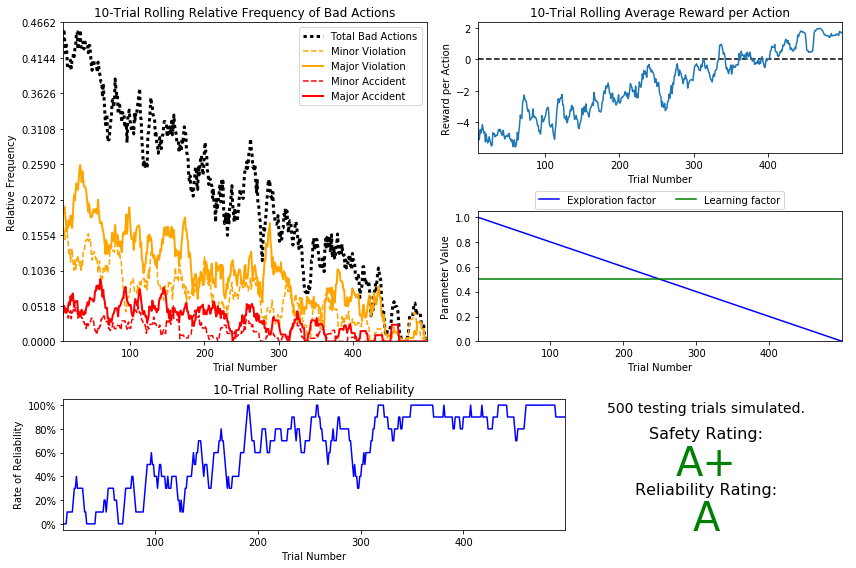

In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
plot_trials('sim_improved-learning.csv')

- The decaying function i chose to use for epsilon was:
     - epsilon = 1 - 1/500 x trial

- Approximately the algorithms needed 500 training trials 

- Alpha=0.5: I chose a medium learning rate to have a balance between the current value and the new reward.
- Tolerance=0.002 to have 500 training trials



**Improvements achieved**         

- During 500 training trials,epsilon decreases slowly from 1 to 0. It appears that the relative frequency of each type of bad actions decreases as the number of trial increases. By the end of the training phase all relative frequencies were approximately equal to 0. The average reward per action was around +2 which is the maximum positive reward can allowed by the environment. The rate of reliability was approximately equal to 90%. As a result, I expect that safety rating won't be less than A+ and the reliability one won't be less than A. When comparing these results with the default Q-learner ones it is obvious that a huge improvement was made in safety and reliability metrics. From **safety and reliability ratings** obtained after **500 test trials** I can say the driving agent has learned the optimal policy with a high trust level.  

### Defining an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, we can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, we can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we not only see it receiving a negative reward but we know also that it is not the correct behavior. This can be used to our advantage to verify whether the **policy** the driving agent has learned is the correct one, or if it is a **suboptimal policy**.

$State$ = $(inputs['light'],$  $waypoint,$ $inputs['oncoming'],$ $inputs['left'])$
    
$Inputs['light']$ : $['red’, ‘green']$

$Inputs['oncoming']:$ $[None, 'forward', 'left', 'right']$

$Inputs['left']:$ $[None, 'forward', 'left', 'right']$

$Waypoint:$ $[None, 'forward', 'left', 'right']$

### *The optimal policy:*

In the optimal policy the agent should take one of the two actions: $None$ or the Waypoint value which means the $next-way-point$.

* When Light is $'red'$ the agent must idle which means the action taken must be equal to $None$
    * Unless if:  the **next_way_point** is equal to $'right'$ And **the traffic coming from Left** won't go $forward$: Left_value ! =  $'forward’$** :
        - In this case the action should be equal to the **next_way_point** which means $right$


* When Light is $'green'$ the agent should choose the **next_way_point** as an action
    * Unless if : **the next_way_point** is equal to $'left'$ And **The Oncoming traffic has direction equal to:** $'forward'$ or $'right'$:
        - In that case **the agent must stop** which means **the chosen action** must be equal to $None$.

## `'sim_improved-learning.txt'` Investigation: 

* From the number of lines in the text file we can calculate the number of recorded states = 96
    - 96 = (580 – 5 + 1) / 6 
    - Earlier we found that size of state space is 128.But it still can be minimized since the waypoint variable will be equal to None only in one case **when the agent arrives to the final destination** and it will be handled by some instructions in the environment.py before using the Q_table. so, the space can be minimized to 96 states.
    - 96=128/4 X 3
    - With the minimized state space it appears that all possible states Were recorded which means that the number of training trials is more than enough to record all the necessary states. 
    - The majority of actions that are not related to the optimal policy were already penalized heavily by the environment (major accident, minor accident, major violations and minor violations). So, the agent won’t have any problem in a state where 3 actions were already penalized heavily but the correct one (the fourth action) has a positive reward. Since the action won’t be performed unless if it was valid and right **in this case right means correct**.
    - But Valid bad (incorrect) actions are still present with reward=1. The agent may choose the valid incorrect action instead of the correct one(reward=+2) if the valid incorrect action is already reinforced by epsilon; Choosing the same action by chance for many times at beginning of training phase when epsilon is very high; and the correct Q_state_action reward is decreased by the learning rate alpha.

##  <center>Examples when the smart cab learned the optimal policy: </center>
------------------------------------------------
###  <center>`'Line=29 in sim_improved_learning.txt'`</center>

<center>**Environment State**</center>

| State keys	| Light 	| Waypoint  | Oncoming    | Left|
|:-----:	|:------:	    |:--------:	|:-----------:|:---:|
|  **State values**	| 'red'	| 'left'  | 'right'   | 'forward'|

 
 
 
#### <center>** Previous Action-Rewards for that state:** </center>

|Valid Actions	| forward 	| right  | None    | left|
|:-----:	|:------:	    |:--------:	|:-----------:|:---:|
|  **Rewards**	| -30.23	| 0.00  | **2.12**   | -20.42|

#### <center>Actions:</center>
<center> Action with the highest reward: **None** </center>
<center> Correct action from the optimal policy: **None**</center>


* Since the waypoint equal to 'left' the two possible actions proposed by the optimal policy are 'left' and None. But since the Light is ‘red ‘the action proposed by the optimal policy is None so the agent should stop. None is the only action with the highest rewards in that state. So, the agent has learned the optimal policy concerning this state.

------------------------------------------

### <center>`'Line=53 in sim_improved_learning.txt'`</center>

<center>**Environment State**</center>

| State keys	| Light 	| Waypoint  | Oncoming    | Left|
|:-----:	|:------:	    |:--------:	|:-----------:|:---:|
|  **State values**	| 'red'	| 'forward'  | 'forward'   | None|

 
 
 
#### <center>** Previous Action-Rewards for that state:** </center>

|Valid Actions	| forward 	| right  | None    | left|
|:-----:	|:------:	    |:--------:	|:-----------:|:---:|
|  **Rewards**	| -11.45	|0.33 | **1.93**   | -10.50|

#### <center>Actions:</center>
<center> Action with the highest reward: **None** </center>
<center> Correct action from the optimal policy: **None**</center>

* Since waypoint is equal to 'forward' the two possible actions proposed by the optimal policy are None and 'forward’. But since the light is red the optimal action (proposed by the optimal policy) is None. The Action None has the highest reward compared to the other actions in this state. So again, the agent proves that he learned the optimal policy for that state.

------------------------------------------------------------
### <center>`'Line=59 in sim_improved_learning.txt'`</center>
<center>**Environment State**</center>

| State keys	| Light 	| Waypoint  | Oncoming    | Left|
|:-----:	|:------:	    |:--------:	|:-----------:|:---:|
|  **State values**	| 'green'	| 'left'  | None   | None|

 
 
 
#### <center>** Previous Action-Rewards for that state:** </center>

|Valid Actions	| forward 	| right  | None    | left|
|:-----:	|:------:	    |:--------:	|:-----------:|:---:|
|  **Rewards**	| 0.44	|0.97 | -4.33   | **1.82**|

#### <center>Actions:</center>
<center> Action with the highest reward: **left** </center>
<center> Correct action from the optimal policy: **left**</center>


* Since waypoint is equal to 'left' the two possible actions proposed by the optimal policy are None and 'left’. But since the light is green and Oncoming is equal to None (different from 'forward' and 'right’) the optimal action (proposed by the optimal policy) is 'left’. The Action 'left' has the highest reward compared to the other actions in this state. And again, the agent proves that he learned the optimal policy for that state.





## <center>Example when the agent didn't learn the optimal policy correctly:</center>
-------------------------------------------
### <center>`'line 23 in sim_improved_learning.txt'`</center>

<center>**Environment State**</center>

| State keys	| Light 	| Waypoint  | Oncoming    | Left|
|:-----:	|:------:	    |:--------:	|:-----------:|:---:|
|  **State values**	| 'green'	| 'left'  | 'right'   | 'forward'|

 
 
 
#### <center>** Previous Action-Rewards for that state:** </center>

|Valid Actions	| forward 	| right  | None    | left|
|:-----:	|:------:	    |:--------:	|:-----------:|:---:|
|  **Rewards**	| 0.27	| **0.28** | -3.10   | -19.72|

#### <center>Actions:</center>
<center> Action with the highest reward: **right** </center>
<center> Correct action from the optimal policy: **None**</center>


* Since waypoint is equal to 'left' the two possible actions proposed by the optimal policy are **None** and **'left’**. But since the light was **'green'** and *Oncoming value* was equal to 'right ‘then the optimal action (proposed by the optimal policy) is **None**.

* In this case the action 'right' has the highest reward which means that the agent will choose to go in the 'right' direction instead of waiting. Since this action is valid but not correct the reward proposed by the environment to this type of action is +1.  The reward proposed by the environment for action equal to None when Light is green is -5.

* This error is due to the violations policy proposed by the environment. When the action is equal to **None** and the **light is green**. The environment policy doesn't care about the next way point when it is equal to **left** and the **oncoming traffic** has **left or right values**, but it considers the action **None** when **light is green **as a minor violation which will be rewarded by -5.


-----
### Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, we did **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

**There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment.** 

Can we figure out what they are and why future rewards won't work for this project?

**Answer:**

* The new states structure we use the discount factor : 
    - **State_K=(Sk_Light, SK_Waypoint, SK_Oncoming, SK_Left,  next_state)**
    - **State_K+1=( Sk1_Light, SK1_Waypoint, SK1_Oncoming, SK1_Left, next_state)**
    - .
    - .
    - **State_n-1(S_n-1light, ………............................., next_state)**
    - **State_n =Destination**


* Rule used to Update the Q_table using future rewards
    - **Q(S,a)=Q(S,a) + alpha x [Reward + Gamma x Max_actions(a’){Q(S’,a’)} - Q(S,a) ]**
    

* **Light:** Cannot be determined in the next future time step. The period of switching is choosed randomly from a periods list. (environment problem)


* **Waypoint:**	The waypoint in the next_state cannot be determined from the current state because the agent has no idea about the final destination (cabin problem)


* **Dummies_Agent:**Predicting the variables Oncoming, Left and Right for the next future positions from the current state implies that the path of the dummies agent is already determined. But in fact, the next_way_point for every dummy agent is constructed randomly (environment problem)


* **State space size** = 128^(T+1) 
    - T is the max number of future time steps can be used to calculate Q(S,a) (curse of dimensionality)



* Now let’s imagine that the environment provides  all  necessary information  no curse of dimensionality and the cabin knows the waypoints for the all states and for enough time steps.
    - What will happen to the agent in the trial number 100 ?(for example)


- We suppose that the Initial state of this agent in the trial number 100  by chance is **State_K** 


- In order that the action with the highest reward in **State_K** gives the agent the best results this implies that: self.t in that previous trial is equal to self.t in this current trial and the dummies agent have the same path in all trials which means that we are repeating the same trial again and again. Else it will affect negatively the Q values because the next positions states (light,waypoint,oncoming,left) in this current trial will be different from the future states calculated at step t trial K which represent the time of the last update of: **Self.Q[State_K][action with the best reward]** .





[**Go back to the beginning**](#step6)

###### This project was completed as a part of the **Machine Learning Engineer Nanodegree** from Udacity.